In [134]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA Applying

In [137]:
# Loading the cleaned data file
df_cleaned = pd.read_csv('DATA/data cleaned.csv')
df_cleaned.head()

,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Male,dataset_Hungary,dataset_VA Long Beach,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,0.940446,0.749760,-0.262867,0.029124,1.069475,-0.718306,-0.770537,1,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1.384143,1.596354,0.747722,-1.790447,0.380309,2.487269,0.857665,1,0,0,...,0,0,0,0,0,1,1,0,1,0
2,1.384143,-0.661231,-0.339138,-0.880662,1.327912,1.418744,0.043564,1,0,0,...,0,0,0,0,0,1,1,0,0,1
3,-1.943588,-0.096835,0.061285,1.632079,2.103224,-0.718306,-0.770537,1,0,0,...,1,0,0,1,0,0,0,0,1,0
4,-1.499891,-0.096835,-0.815830,0.982232,0.294163,-0.718306,-0.770537,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [139]:
# Separate features (X) and target (y) ---> x will be all coulmns exept (num) which is the target and y will be the target
x = df_cleaned.drop('num', axis=1)
y = df_cleaned['num']


In [141]:
# Applying PCA for Dimensionality Reduction 
pca = PCA(n_components=0.95)  # We will apply PCA to retain 95% of the variance
X_pca = pca.fit_transform(x)

In [143]:
# Determining the optimal number of principal components
print(f"Original number of features: {x.shape[1]}")
print(f"Number of principal components selected to retain 95% variance: {X_pca.shape[1]}")


Original number of features: 20
Number of principal components selected to retain 95% variance: 12


In [145]:
# Calculate cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

In [147]:
# Determining the explained variance ratio of the selected components
print("\nExplained variance ratio of each selected component:")
print(explained_variance)
print("\nTotal explained variance:")
print(np.sum(explained_variance))


Explained variance ratio of each selected component:
[0.27921267 0.14660816 0.11030402 0.09773341 0.09185442 0.05946526
 0.04678629 0.03592562 0.02955884 0.02632305 0.01968284 0.01761743]

Total explained variance:
0.9610720041973332


* Visualizing the PCA results

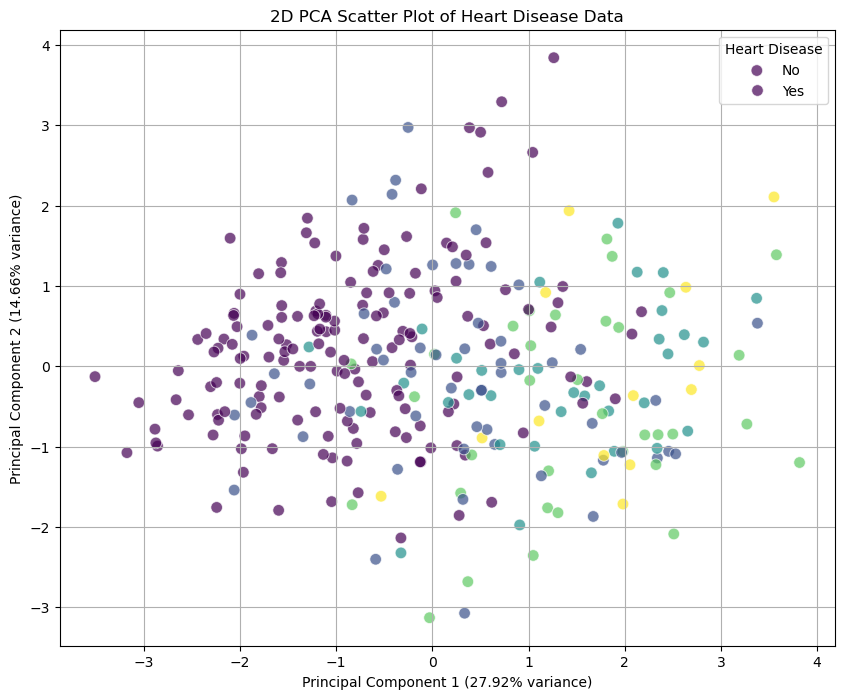

In [150]:
# using the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=y,
    palette='viridis',
    s=70,
    alpha=0.7,
)
plt.title('2D PCA Scatter Plot of Heart Disease Data')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}% variance)')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.grid(True)
plt.show()

* cumulative variance plot

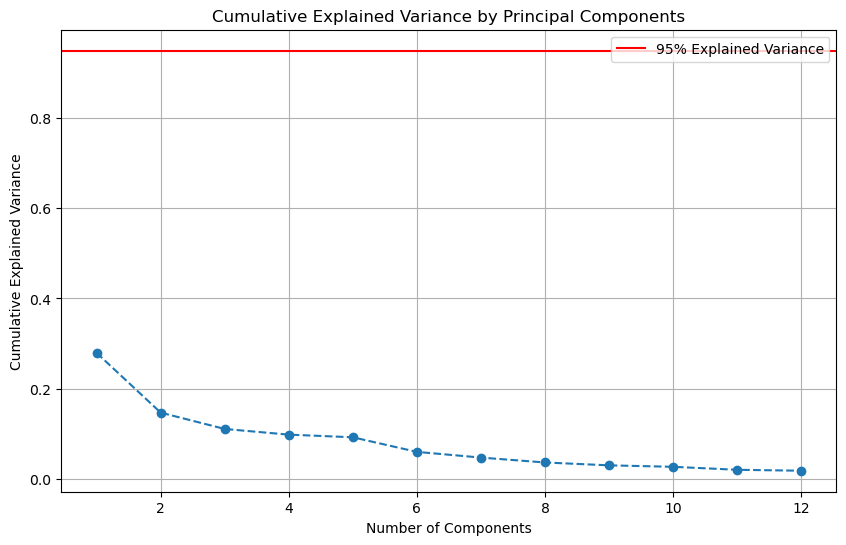

In [152]:
# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()